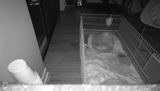

In [1]:
# %%
from fastai.vision.all import *
import pandas as pd


path = Path('data')
(path/'1').ls()
# %%
img_files = get_image_files(path)
def img2pose(x): return Path('labels')/f'{x.parent.stem}.csv'
img2pose(img_files[0])
# %%
im = PILImage.create(img_files[0])
im.shape
# %%
im.to_thumb(160)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


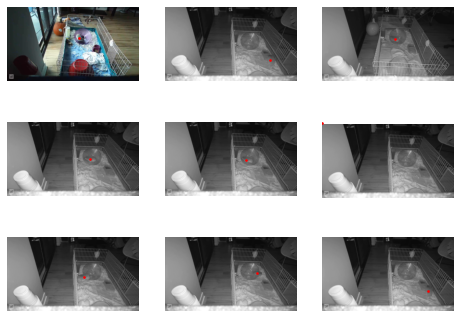

In [2]:
# %%
def get_ctr(f):
    df = pd.read_csv(img2pose(f))
    idx = int(f.stem)-1
    x = df.x[idx]
    y = df.y[idx]
    return tensor([x,y])
# %%
shrink_factor = 4
hog = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter = RandomSplitter(),
    item_tfms=Resize((1080//shrink_factor, 1920//shrink_factor), method='squeeze')
)
# %%
dls = hog.dataloaders(path)
dls.show_batch(max_n=9, figsize=(8,6))

epoch,train_loss,valid_loss,time
0,0.658200,0.663096,00:08


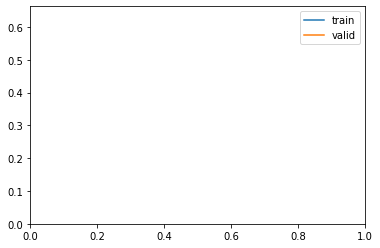

epoch,train_loss,valid_loss,time
0,0.547646,0.637180,00:05
1,0.528703,0.560226,00:05
2,0.531360,0.451421,00:05
3,0.518678,0.368974,00:05
4,0.506892,0.351168,00:05
5,0.472417,0.292626,00:05
6,0.467338,0.260098,00:05
7,0.447562,0.241759,00:05
8,0.430337,0.262544,00:05
9,0.422597,0.298613,00:05


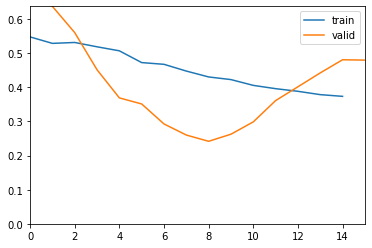

In [3]:
# %%
learn = cnn_learner(dls, resnet18, y_range=(-1,1), cbs=ShowGraphCallback())
# %%
# learn.lr_find()
# %%
learn.fine_tune(15, 1e-3)

Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback, ShowGraphCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : []
         - after_pred     : []
         - after_loss     : []
         - before_backward: []
         - before_step    : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback, ShowGraphCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_validate : [Recorder, Progress

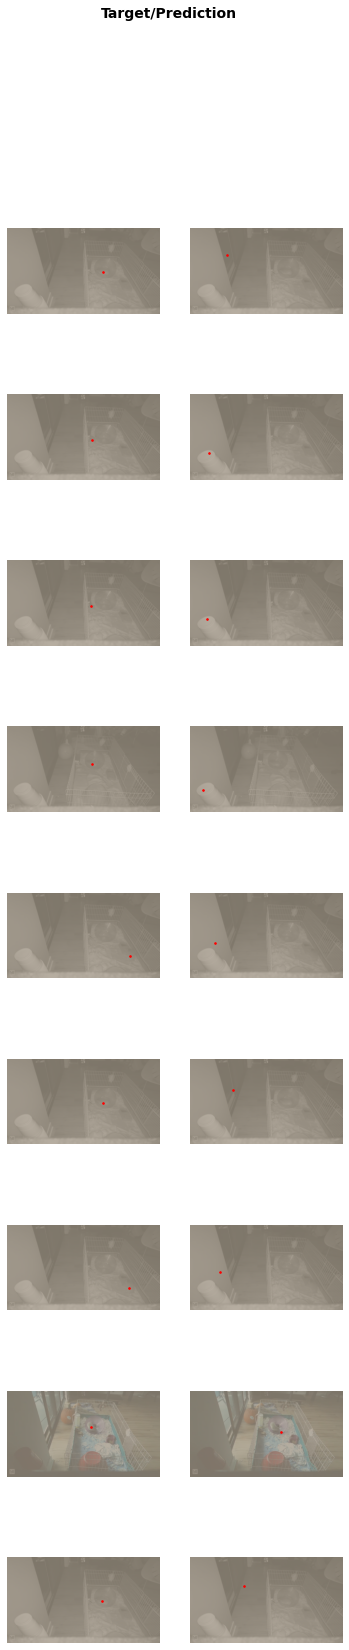

In [4]:
# %%
learn.show_results()
# %%
learn.show_training_loop()
# %%